# Histogram equalization

In [4]:
import numpy as np
import tifffile as tif
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
def read_tif(fname):
    
    t = tif.imread(fname)
    img = np.zeros(t.shape)
    img[:,:] = tif.imread(fname)
    
    return img


def normalize(tile):
    
    vmin = tile.min(); vmax = tile.max()
    new_tile = (tile-vmin)*255/(vmax-vmin)
    
    return new_tile.astype("uint8")

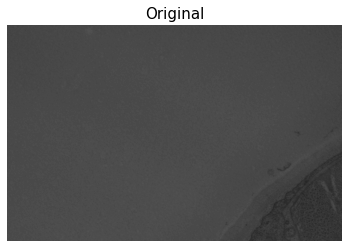

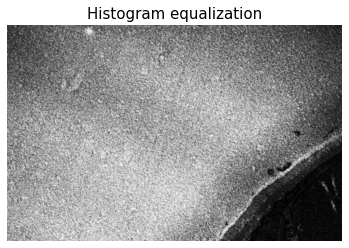

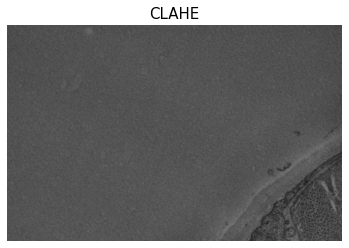

In [75]:
fname = "/data/research/se/celegans/dataset3/N2DA_1430-2/L1/tif/L1_s0028.tif"
tile = read_tif(fname)
tile = normalize(tile)

plt.figure()
plt.imshow(tile, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Original", fontsize=15)
plt.show()

tile_histeq = cv2.equalizeHist(tile)

plt.figure()
plt.imshow(tile_histeq, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Histogram equalization", fontsize=15)
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
tile_clahe = clahe.apply(tile)

plt.figure()
plt.imshow(tile_clahe, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("CLAHE", fontsize=15)
plt.show()

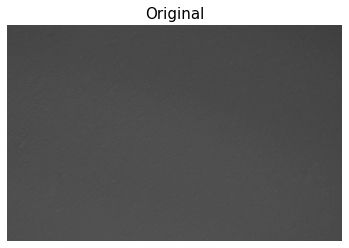

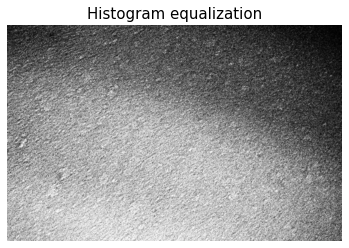

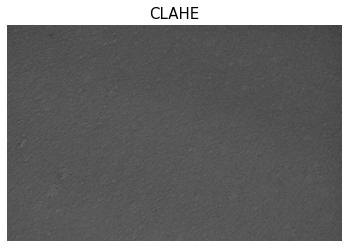

In [46]:
fname = "/data/research/se/celegans/dataset3/N2DA_1430-2/L1/tif/L1_s0015.tif"
tile = read_tif(fname)
tile = normalize(tile)

plt.figure()
plt.imshow(tile, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Original", fontsize=15)
plt.show()

tile_histeq = cv2.equalizeHist(tile)

plt.figure()
plt.imshow(tile_histeq, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Histogram equalization", fontsize=15)
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
tile_clahe = clahe.apply(tile)

plt.figure()
plt.imshow(tile_clahe, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("CLAHE", fontsize=15) 
plt.show()

## Brightness adjustment

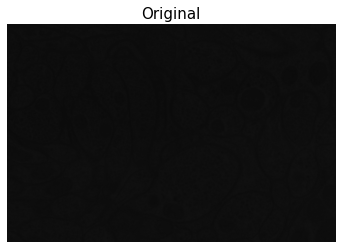

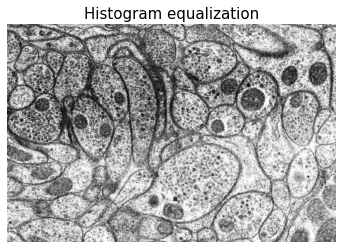

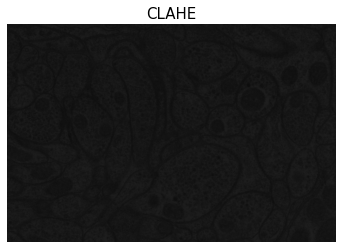

In [27]:
fname = "/data/research/se/celegans/dataset3/N2DA_1430-2/L4/tif/L4_s2949.tif"
tile = read_tif(fname)
tile = normalize(tile)

plt.figure()
plt.imshow(tile, cmap="gray")
plt.axis("off")
plt.title("Original", fontsize=15)
plt.show()

tile_histeq = cv2.equalizeHist(tile)

plt.figure()
plt.imshow(tile_histeq, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Histogram equalization", fontsize=15)
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
tile_clahe = clahe.apply(tile)

plt.figure()
plt.imshow(tile_clahe, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("CLAHE", fontsize=15) 
plt.show()

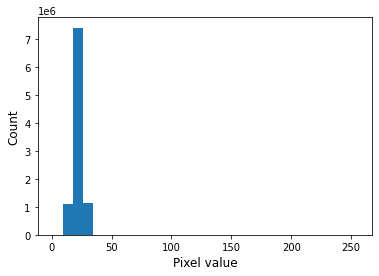

Mean = 21.90615286982857, Var = 13.736489729234782


In [24]:
plt.figure()
plt.hist(tile_clahe.reshape((-1,)), bins=30)
plt.xlabel("Pixel value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

print("Mean = {}, Var = {}".format(np.mean(tile_clahe), np.var(tile_clahe)))

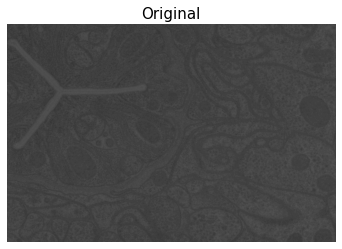

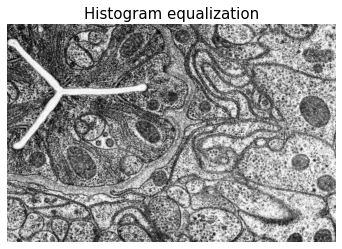

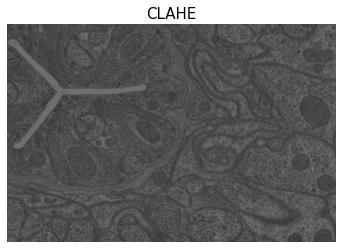

In [33]:
fname = "/data/research/se/celegans/dataset3/N2DA_1430-2/L4/tif/L4_s2948.tif"
tile = read_tif(fname)
tile = normalize(tile)

plt.figure()
plt.imshow(tile, cmap="gray")
plt.axis("off")
plt.title("Original", fontsize=15)
plt.show()

tile_histeq = cv2.equalizeHist(tile)

plt.figure()
plt.imshow(tile_histeq, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Histogram equalization", fontsize=15)
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
tile_clahe = clahe.apply(tile)

plt.figure()
plt.imshow(tile_clahe, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("CLAHE", fontsize=15) 
plt.show()

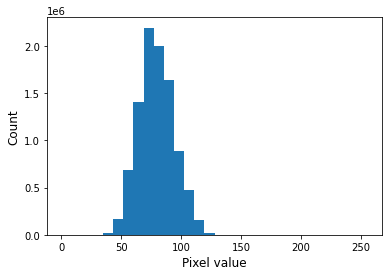

Mean = 79.57208820953745, Var = 211.37975182453104


In [34]:
plt.figure()
plt.hist(tile_clahe.reshape((-1,)), bins=30)
plt.xlabel("Pixel value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

print("Mean = {}, Var = {}".format(np.mean(tile_clahe), np.var(tile_clahe)))

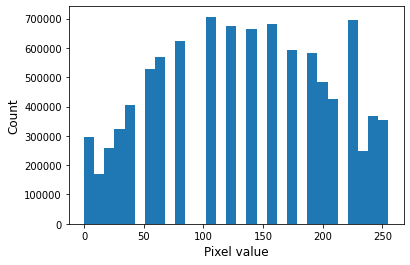

Mean = 134.0570218375992, Var = 5362.698666794645


In [32]:
plt.figure()
plt.hist(tile_histeq.reshape((-1,)), bins=30)
plt.xlabel("Pixel value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

print("Mean = {}, Var = {}".format(np.mean(tile_histeq), np.var(tile_histeq)))

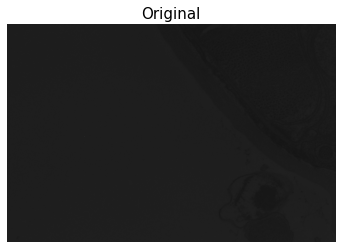

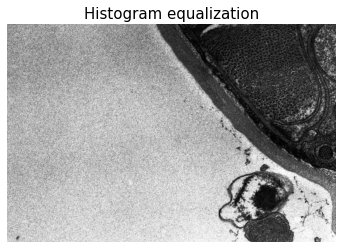

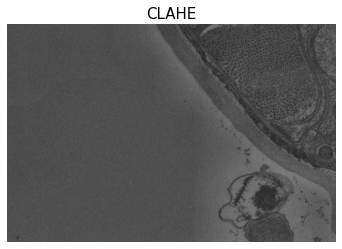

In [56]:
fname = "/data/research/se/celegans/dataset3/N2DA_1430-2/L4/tif/L4_s2606.tif"
tile = read_tif(fname)
tile = normalize(tile)

plt.figure()
plt.imshow(tile, cmap="gray")
plt.axis("off")
plt.title("Original", fontsize=15)
plt.show()

tile_histeq = cv2.equalizeHist(tile)

plt.figure()
plt.imshow(tile_histeq, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Histogram equalization", fontsize=15)
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
tile_clahe = clahe.apply(tile)
b = 80
a = (200/np.var(tile_clahe))**0.5
tile_clahe = np.clip(a*(tile_clahe-np.mean(tile_clahe)) + b, 0, 255)

plt.figure()
plt.imshow(tile_clahe, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("CLAHE", fontsize=15) 
plt.show()

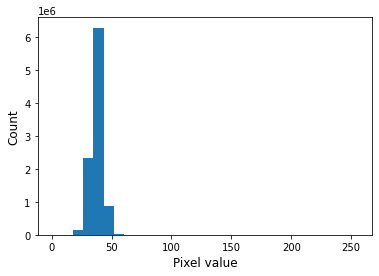

Mean = 37.17558118465223, Var = 21.8486011919676


In [55]:
plt.figure()
plt.hist(tile_clahe.reshape((-1,)), bins=30)
plt.xlabel("Pixel value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

print("Mean = {}, Var = {}".format(np.mean(tile_clahe), np.var(tile_clahe)))

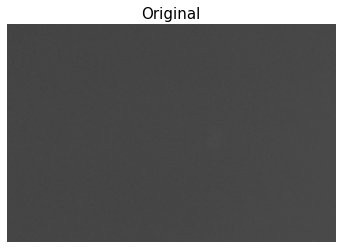

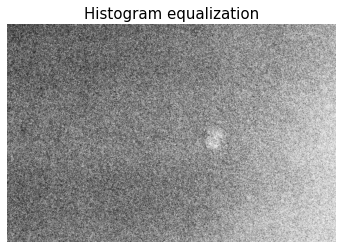

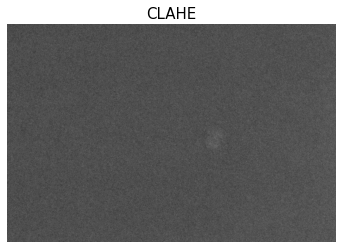

In [47]:
fname = "/data/research/se/celegans/dataset3/N2DA_1430-2/L4/tif/L4_s2916.tif"
tile = read_tif(fname)
tile = normalize(tile)

plt.figure()
plt.imshow(tile, cmap="gray")
plt.axis("off")
plt.title("Original", fontsize=15)
plt.show()

tile_histeq = cv2.equalizeHist(tile)

plt.figure()
plt.imshow(tile_histeq, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Histogram equalization", fontsize=15)
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
tile_clahe = clahe.apply(tile)
b = 80
a = (200/np.var(tile_clahe))**0.5
tile_clahe = np.clip(a*(tile_clahe-np.mean(tile_clahe)) + b, 0, 255)

plt.figure()
plt.imshow(tile_clahe, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("CLAHE", fontsize=15) 
plt.show()

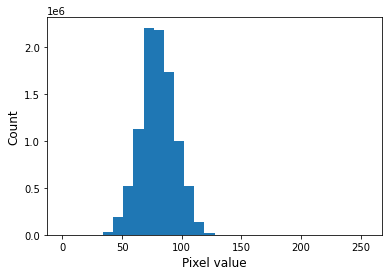

Mean = 79.99997910136378, Var = 199.98138238511052


In [48]:
plt.figure()
plt.hist(tile_clahe.reshape((-1,)), bins=30)
plt.xlabel("Pixel value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

print("Mean = {}, Var = {}".format(np.mean(tile_clahe), np.var(tile_clahe)))

In [88]:
from os import listdir, path

d = "/data/research/se/celegans/dataset3/N2DA_1430-2/L4/tif/"
flist = listdir(d)

var_list = []

for i in range(107):
    
    fname = path.join(d, flist[i])
    img = read_tif(fname)
    img = normalize(img)
    img = clahe.apply(img)
    
    var_list.append(np.var(img))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106


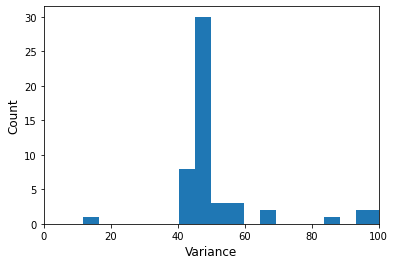

In [89]:
plt.figure()
plt.hist(var_list, bins=110)
plt.xlabel("Variance", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xlim(0,100)
plt.show()

### z=261

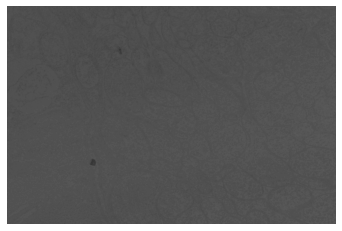

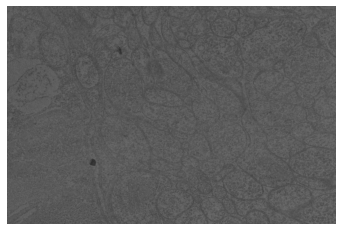

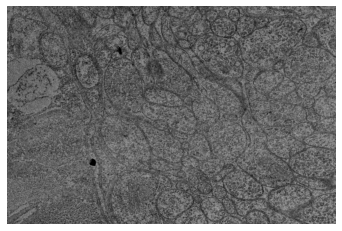

In [22]:
fname = "/data/research/se/celegans/dataset3/N2DA_1430-2/L4/tif/L4_s2291.tif"

tile = read_tif(fname)
tile = normalize(tile)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
tile_clahe = clahe.apply(tile)
b = 95
a = (1000/np.var(tile_clahe))**0.5
tile_new = np.clip(a*(tile_clahe-np.mean(tile_clahe)) + b, 0, 255)

plt.figure()
plt.imshow(tile, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(tile_clahe, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(tile_new, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()

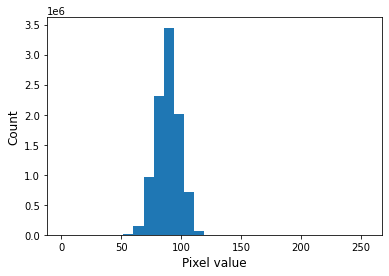

Mean = 89.05286949685535, Var = 91.21234513985678


In [14]:
img = tile_clahe

plt.figure()
plt.hist(img.reshape((-1,)), bins=30)
plt.xlabel("Pixel value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

print("Mean = {}, Var = {}".format(np.mean(img), np.var(img)))

In [18]:
import os

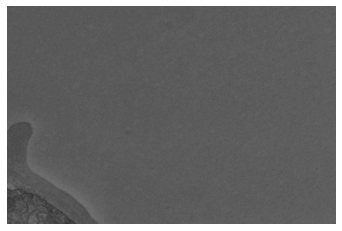

59.31932639282704


In [113]:
i = 39

fname = os.path.join(d,flist[i])
tile = read_tif(fname)
tile = normalize(tile)
tile = clahe.apply(tile)

plt.figure()
plt.imshow(tile, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()

print(np.var(tile))

In [57]:
np.var(tile)

7.293491710767559

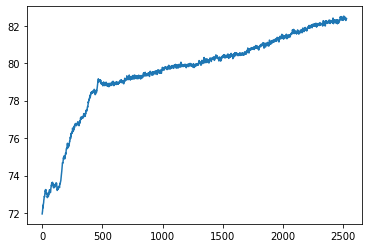

In [43]:
plt.plot(np.mean(tile,axis=1))

In [39]:
np.var(np.mean(tile,axis=0))

4.483259735081933